<center><h1><span style="color: green;">THỰC HÀNH BUỔI 6</span></h1></center>

# A. BINARY LABELED DATA 

## Ví dụ A.1 

**(a) Chương trình Python**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

np.random.seed(12)

means = [[0, 3], [2, 0]]
cov1 = [[1, 0.3], [0.3, 1]]
cov2 = [[1, 0.2], [0.2, 1.5]]
N1 = 50
N2 = 40
N = N1 + N2
X1 = np.random.multivariate_normal(means[0], cov1, N1) # each row is a data point
X2 = np.random.multivariate_normal(means[1], cov2, N2)

# Combine classes and create labels
X = np.vstack((X1, X2))
y = np.hstack((np. ones(50), 2*np.ones(40)))


Number of samples in Class 1: 50
Number of samples in Class 2: 40
Mean of Class 1: [0.2041277  3.04666639]
Mean of Class 2: [ 1.80478915 -0.18249896]


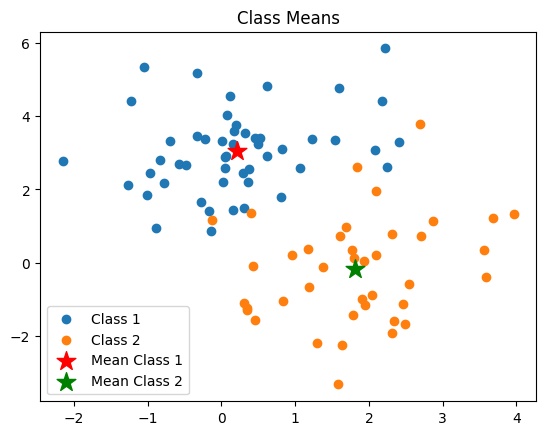

In [6]:
# Separate data by class to class1 (y=0) and class2 (y=1)
class1 = X[y == 1]
class2 = X[y == 2]

print("Number of samples in Class 1:", class1.shape[0])
print("Number of samples in Class 2:", class2.shape[0])

# Calculate class means
mean1 = np.mean(class1, axis=0)
mean2 = np.mean(class2, axis=0)

print("Mean of Class 1:", mean1)
print("Mean of Class 2:", mean2)

# Visualize class means
plt.scatter(class1[:, 0], class1[:, 1], label='Class 1')
plt.scatter(class2[:, 0], class2[:, 1], label='Class 2')
plt.scatter(mean1[0], mean1[1], color='red', s=200, marker='*', label='Mean Class 1')
plt.scatter(mean2[0], mean2[1], color='green', s=200, marker='*', label='Mean Class 2')
plt.legend()
plt.title('Class Means')
plt.show()


In [11]:
# Build S_B
m1 = np.mean(X1.T, axis = 1, keepdims = True)
m2 = np.mean(X2.T, axis = 1, keepdims = True)

a = (m2 - m1)
S_B = a.dot(a.T)

# Build S_W
SW1 = X1.T - np.tile(m1, (1, N1))
SW2 = X2.T - np.tile(m2, (1, N2))

S_W = SW1.dot(SW1.T) + SW2.dot(SW2.T)
print('Between-class covariance matrix: S_B =\n', S_B)
print('Within-class covariance matrix: S_W =\n',S_W)

Between-class covariance matrix: S_B =
 [[ 2.56211707 -5.16880049]
 [-5.16880049 10.42750887]]
Within-class covariance matrix: S_W =
 [[ 86.83642101  27.51782236]
 [ 27.51782236 140.23997255]]


In [28]:
L, W = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
print(W)
print(L)
i = np.argmax(L)
w = W[:, i]
# print(w.shape)

[[-0.89596689  0.69467319]
 [-0.44412085 -0.71932549]]
[0.         0.13565422]


(50,) (2,)
(2, 50) (2, 40)


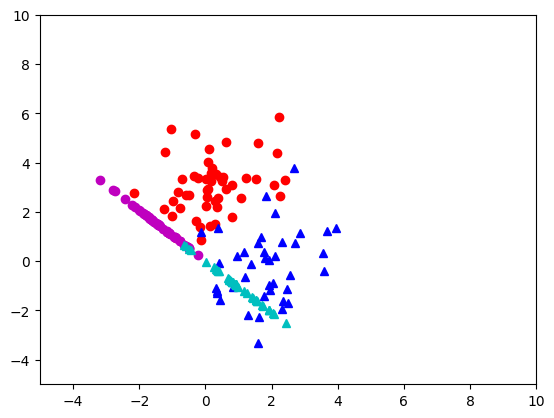

In [29]:
# Visualize data
plt.plot(X1[:, 0], X1[:, 1], 'ro')
plt.plot(X2[:, 0], X2[:, 1], 'b^')
plt.axis([-5, 10, -5, 10])
#Compute projections of data points on to LDA's dimention
#
norm_W = w.T.dot(w)
X1_tmp = X1.dot(w)/norm_W
X2_tmp = X2.dot(w)/norm_W

print(X1_tmp.shape, w.shape)

X1_p = np.multiply(w.reshape(2,1), X1_tmp.T)
X2_p = np.multiply(w.reshape(2,1), X2_tmp.T)

print(X1_p.shape,X2_p.shape)

#Draw projected points
plt.plot(X1_p[0, :], X1_p[1, :], 'mo')
plt.plot(X2_p[0, :], X2_p[1, :], 'c^')
plt.show()

**(b) Sử dụng thư viện SKLearn**

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Initialize LDA and fit the model
lda = LinearDiscriminantAnalysis(n_components=1)

X_lda = lda.fit_transform(X, y)

## Ví dụ A.2

## Bài tập thực hành 1

In [24]:
# Import các thư viện cần thiết
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [19]:
# In ra số lượng các mẫu ứng vối mỗi class
df= pd.read_csv("pd_speech_features.csv")
df.head()
# df['class'].value_counts()
# sns.pairplot(df, hue='class')

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


#### _(1) Giảm số chiều xuống còn 01 chiều bằng phương pháp LDA và 02 chiều bằng PCA nhằm phục vụ cho việc phân loại dữ liệu (theo class)._

In [20]:
# We're separating the class column
species = df["class"].tolist()
X = df.drop(columns=["class", "id"])  # Drop both 'class' and 'id' columns

# Giảm chiều bằng LDA xuống 1 chiều
lda = LDA(n_components=1)  # Vì đây là bài toán phân loại 2 lớp (giả định từ 'class')
X_lda = lda.fit_transform(X, species)

# Giảm chiều bằng PCA xuống 2 chiều
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print("Kích thước dữ liệu sau LDA (1 chiều):", X_lda.shape)
print("Kích thước dữ liệu sau PCA (2 chiều):", X_pca.shape)

Kích thước dữ liệu sau LDA (1 chiều): (756, 1)
Kích thước dữ liệu sau PCA (2 chiều): (756, 2)


In [21]:
# Chia dữ liệu Train (500 bản ghi) và Test (phần còn lại) cho cả LDA và PCA
X_train_lda, X_test_lda, y_train, y_test = train_test_split(X_lda, species, train_size=500, random_state=42)
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, species, train_size=500, random_state=42)

# Khởi tạo và huấn luyện mô hình RandomForest cho LDA
rf_lda = LogisticRegression(random_state=42)
rf_lda.fit(X_train_lda, y_train)

# Khởi tạo và huấn luyện mô hình RandomForest cho PCA
rf_pca = LogisticRegression(random_state=42)
rf_pca.fit(X_train_pca, y_train)

# Dự đoán trên tập test
y_pred_lda = rf_lda.predict(X_test_lda)
y_pred_pca = rf_pca.predict(X_test_pca)

Accuracy của mô hình với LDA: 1.0


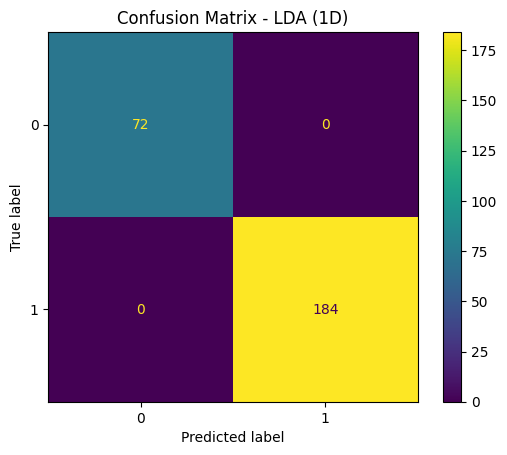

Accuracy của mô hình với PCA: 0.625


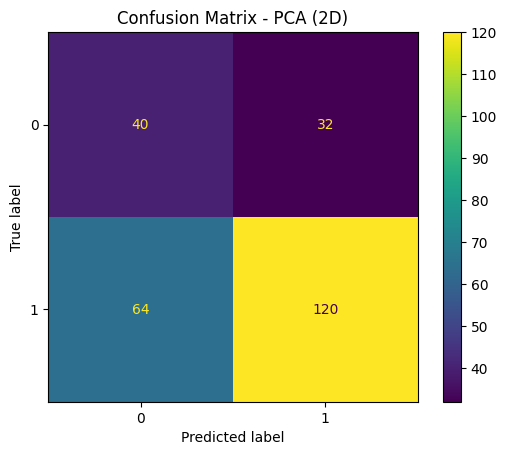

In [22]:
# Đánh giá mô hình LDA
accuracy_lda = accuracy_score(y_test, y_pred_lda)
print("Accuracy của mô hình với LDA:", accuracy_lda)

# Vẽ confusion matrix cho LDA
cm_lda = confusion_matrix(y_test, y_pred_lda)
disp_lda = ConfusionMatrixDisplay(confusion_matrix=cm_lda)
disp_lda.plot()
plt.title("Confusion Matrix - LDA (1D)")
plt.show()

# Đánh giá mô hình PCA
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print("Accuracy của mô hình với PCA:", accuracy_pca)

# Vẽ confusion matrix cho PCA
cm_pca = confusion_matrix(y_test, y_pred_pca)
disp_pca = ConfusionMatrixDisplay(confusion_matrix=cm_pca)
disp_pca.plot()
plt.title("Confusion Matrix - PCA (2D)")
plt.show()

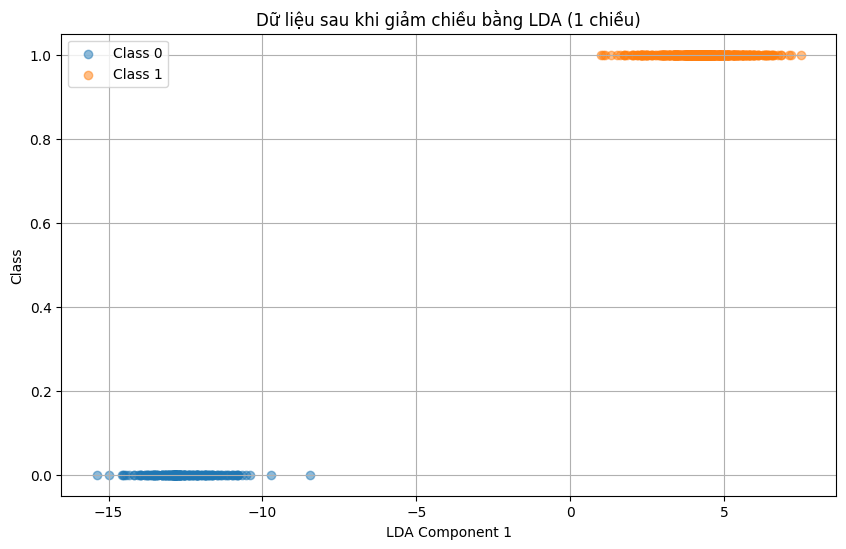

In [27]:
# Chuyển species thành mảng numpy để dễ xử lý
y = np.array(species)

# Tạo scatter plot
plt.figure(figsize=(10, 6))
for label in np.unique(y):
    plt.scatter(X_lda[y == label], [label] * sum(y == label), 
                label=f'Class {label}', alpha=0.5)

# Đặt nhãn và tiêu đề
plt.xlabel('LDA Component 1')
plt.ylabel('Class')
plt.title('Dữ liệu sau khi giảm chiều bằng LDA (1 chiều)')
plt.legend()
plt.grid(True)

# Hiển thị đồ thị
plt.show()

=> Dựa vào biều đồ sau khi giảm chiều LDA (1 chiều) ta có thể thấy số mẫu của hai class được phân tách hoàn toàn nên dễ hiểu khi 'accuracy' của phương pháp LDA(1D) = 1

#### _(2) Sử dụng dữ liệu ban đầu, chia thành các tập Train- Test với tỷ lệ 3:1, sau đó áp dụng phương pháp Naïve Bayes phù hợp và phương pháp Hồi quy Logistic để thực hiện bài toán phân loại (theo class)._

Accuracy Naïve Bayes (dữ liệu gốc): 68 %


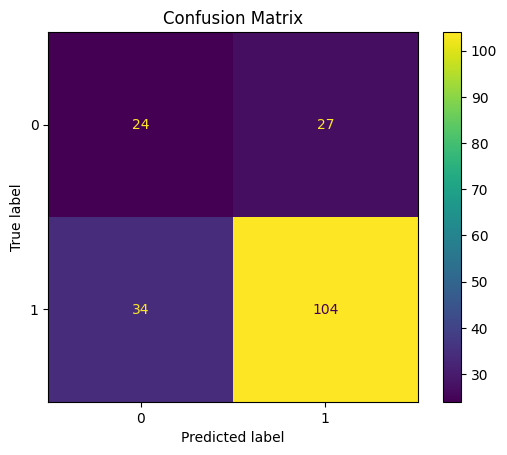

Accuracy Hồi quy Logistic (dữ liệu gốc): 74 %


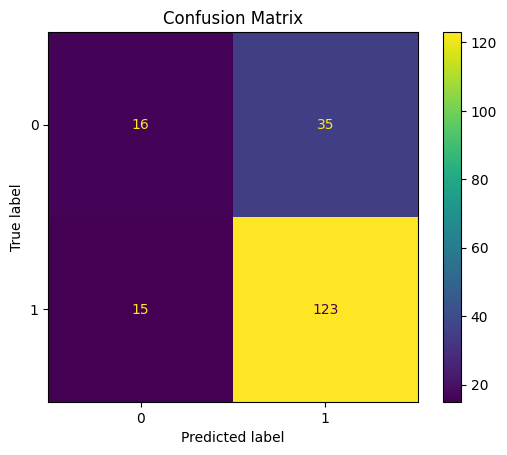

In [30]:
from sklearn.naive_bayes import GaussianNB

# Chia dữ liệu ban đầu thành Train và Test với tỷ lệ 3:1
X_train, X_test, y_train, y_test = train_test_split(X, species, test_size=0.25, random_state=42)

# Naïve Bayes (GaussianNB phù hợp với dữ liệu liên tục)
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
accuracy_nb_raw = accuracy_score(y_test, y_pred_nb)
print("Accuracy Naïve Bayes (dữ liệu gốc):", round(accuracy_nb_raw * 100), "%")
# Vẽ confusion matrix
cm_GNB = confusion_matrix(y_test, y_pred_nb)
disp_GNB = ConfusionMatrixDisplay(confusion_matrix=cm_GNB)
disp_GNB.plot()
plt.title("Confusion Matrix")
plt.show()

# Hồi quy Logistic
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
accuracy_lr_raw = accuracy_score(y_test, y_pred_lr)
print("Accuracy Hồi quy Logistic (dữ liệu gốc):", round(accuracy_lr_raw * 100), "%")
# Vẽ confusion matrix
cm_LR = confusion_matrix(y_test, y_pred_lr)
disp_LR = ConfusionMatrixDisplay(confusion_matrix=cm_LR)
disp_LR.plot()
plt.title("Confusion Matrix")
plt.show()

**Thực nghiệm các mô hình nói trên với dữ liệu đã giảm chiều**

In [33]:
# Chia dữ liệu PCA thành Train và Test với tỷ lệ 3:1
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, species, test_size=0.25, random_state=42)

# Naïve Bayes với dữ liệu PCA
nb_pca = GaussianNB()
nb_pca.fit(X_train_pca, y_train)
y_pred_nb_pca = nb_pca.predict(X_test_pca)
accuracy_nb_pca = accuracy_score(y_test, y_pred_nb_pca)
print("Accuracy Naïve Bayes (PCA 2D):", round(accuracy_nb_pca * 100), "%")

# Hồi quy Logistic với dữ liệu PCA
lr_pca = LogisticRegression(max_iter=1000, random_state=42)
lr_pca.fit(X_train_pca, y_train)
y_pred_lr_pca = lr_pca.predict(X_test_pca)
accuracy_lr_pca = accuracy_score(y_test, y_pred_lr_pca)
print("Accuracy Hồi quy Logistic (PCA 2D):", round(accuracy_lr_pca * 100), "%")

Accuracy Naïve Bayes (PCA 2D): 71 %
Accuracy Hồi quy Logistic (PCA 2D): 61 %


=> Tổng kết lại ta thấy:
- Accuracy Naïve Bayes (dữ liệu gốc): 68 %
- Accuracy Hồi quy Logistic (dữ liệu gốc): 74 %
- Accuracy Naïve Bayes (PCA 2D): 71 %
- Accuracy Hồi quy Logistic (PCA 2D): 61 %

**Giải thích**
- Naïve Bayes giả định các đặc trưng độc lập với nhau, nên khi giảm chiều (đặc biệt với LDA tối ưu hóa phân tách lớp), nó có thể bị ảnh hưởng nhiều hơn nếu thông tin bị mất đi hoặc không còn phù hợp với giả định độc lập.
- Hồi quy Logistic thường ít nhạy hơn với việc giảm chiều vì nó dựa vào sự kết hợp tuyến tính của các đặc trưng, và dữ liệu giảm chiều (đặc biệt LDA) vẫn giữ được thông tin phân tách lớp tốt.
- **Kết luận**: Naïve Bayes thường có độ chính xác thay đổi nhiều hơn do nhạy cảm với sự mất mát thông tin từ giảm chiều.

# B. LDA FOR MULTINOMIAL DATA

## Ví dụ B.1

_Đoạn chương trình đọc tệp dữ liệu, truy xuất một số thông tin thống kê trên dữ liệu. Khai báo thư viện và đường
dẫn đến tệp dữ liệu._

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
X = iris.data
Y = iris.target
label_dict = {0:'Setosa', 1:'Versicolor', 2:'Virginica'}

_Tính toán d-dimensional mean vectors của các class dữ liệu_

In [6]:
np.set_printoptions(precision = 4)
mean_vectors = []
for cl in range(0,3):
    mean_vectors.append(np.mean(X[Y==cl], axis=0))
    print('Mean vector of class', cl+1, mean_vectors[cl],'.T')

Mean vector of class 1 [5.006 3.428 1.462 0.246] .T
Mean vector of class 2 [5.936 2.77  4.26  1.326] .T
Mean vector of class 3 [6.588 2.974 5.552 2.026] .T


_Tính toán các ma trận within-class scatter matrix và_ $S_w = \sum_{i=1}^{c} S_i$ _với_ $S_i = \sum_{\mathbf{x} \in D_i} (\mathbf{x} - \mathbf{m}_i) (\mathbf{x} - \mathbf{m}_i)^T$

In [7]:
S_W = np.zeros((4,4))
for cl, mv in zip(range(0, 3), mean_vectors):
    class_sc_mat = np.zeros((4,4))
    for row in X[Y == cl]:
        row = row.reshape(4, 1)
        mv = mv.reshape(4, 1)
        class_sc_mat += (row - mv).dot((row -mv).T)
    S_W += class_sc_mat

print(S_W)

[[38.9562 13.63   24.6246  5.645 ]
 [13.63   16.962   8.1208  4.8084]
 [24.6246  8.1208 27.2226  6.2718]
 [ 5.645   4.8084  6.2718  6.1566]]


_và between-class scatter matrix_ $S_B = \sum_{i=1}^{c} N_i (\mathbf{m}_i - \mathbf{m}) (\mathbf{m}_i - \mathbf{m})^T$

In [8]:
#the calculate the overall mean with a simple function
overall_mean = np.mean(X, axis = 0)

#initialize zeros mnatrix
S_B = np.zeros((4,4))
#For every iteration in the mean vectors
for cl,mean_vec in enumerate(mean_vectors):
    #Extracting the number of samples per class, in this case, 50
    n = X[Y==cl,:].shape[0]
    #Reshaping matrices from 1x4 to 4x1 for better manipulation
    mean_vec = mean_vec.reshape(4,1)
    overall_mean = overall_mean.reshape(4,1)
    #Applying the equation
    S_B += n * (mean_vec - overall_mean) .dot((mean_vec - overall_mean).T)

print(S_B)

[[ 63.2121 -19.9527 165.2484  71.2793]
 [-19.9527  11.3449 -57.2396 -22.9327]
 [165.2484 -57.2396 437.1028 186.774 ]
 [ 71.2793 -22.9327 186.774   80.4133]]


_Tính ma trận_ $(S_W)^{-1}S_B$ _và hệ riêng của nó:_

In [9]:
eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eigenvalues)):
    eigenvectors_sc = eigenvectors[:,i].reshape(4,1)
    print("\nEigenvector {}: \n{}".format(i+1, eigenvectors_sc.real))
    print("Eigenvalue {:}: {:.2e}".format(i+1, eigenvalues[i].real))


Eigenvector 1: 
[[-0.2087]
 [-0.3862]
 [ 0.554 ]
 [ 0.7074]]
Eigenvalue 1: 3.22e+01

Eigenvector 2: 
[[-0.0065]
 [-0.5866]
 [ 0.2526]
 [-0.7695]]
Eigenvalue 2: 2.85e-01

Eigenvector 3: 
[[ 0.8852]
 [-0.2933]
 [-0.2711]
 [-0.2387]]
Eigenvalue 3: -1.50e-15

Eigenvector 4: 
[[-0.3121]
 [ 0.4177]
 [ 0.4755]
 [-0.7086]]
Eigenvalue 4: -8.77e-15


_Đoạn chương trình dưới đây hiển thị giá trị riêng theo thứ tự giảm dần và phương sai giải thích tương ứng_

In [10]:
#List of every eigenvector and its corresponding eigenvalue
eigen_pairs = [(np.abs(eigenvalues[i]),eigenvectors[:,i]) for i in range(len(eigenvalues))]

#Sorting in descending order
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse = True)

print("Eigenvalues in decreasing order: \n")
for i in eigen_pairs:
    print (i[0])
    
print("Variance Explained: \n")
eigenvalues_sum = sum(eigenvalues)
for i,j in enumerate(eigen_pairs):
    print("Eigenvalue {0:}: {1: .2%}".format(i+1, (j[0]/eigenvalues_sum).real))

Eigenvalues in decreasing order: 

32.191929198278025
0.2853910426230718
8.76730985628199e-15
1.5047006570787716e-15
Variance Explained: 

Eigenvalue 1:  99.12%
Eigenvalue 2:  0.88%
Eigenvalue 3:  0.00%
Eigenvalue 4:  0.00%


_In ra ma trận **W** (ma trận chiếu)_

In [11]:
W = np.hstack((eigen_pairs[0][1].reshape(4,1), eigen_pairs[1][1].reshape(4,1)))
print("Matrix W:\n",W.real)

Matrix W:
 [[-0.2087 -0.0065]
 [-0.3862 -0.5866]
 [ 0.554   0.2526]
 [ 0.7074 -0.7695]]


_Chiếu dữ liệu trong không gian mới thành lập và hiển thị:_

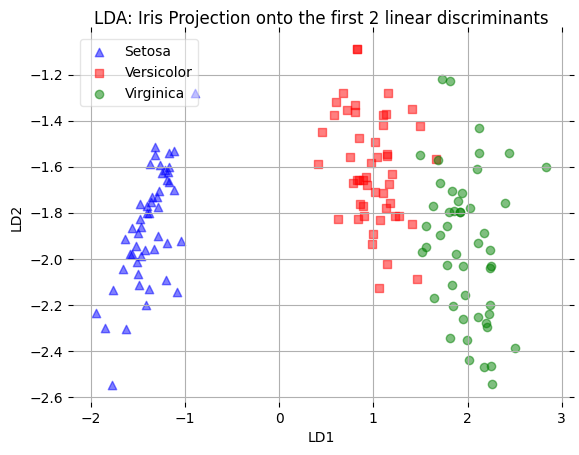

In [12]:
X_lda= X.dot (W)
#will throw an error in case the dot product has made an error assert
X_lda.shape == (150,2), "The matrix is not 150x2 dimensional"

def plot_step_lda():
    ax = plt.subplot(111)
    for label, marker, color in zip(range(0,3), ("^", "s", "o"), ("blue", "red", "green")):
        plt.scatter (x = X_lda[:,0].real [Y== label],
            y= X_lda[:,1].real [Y ==label],
            marker = marker,
            color =color,
            alpha = 0.5,
            label = label_dict[label])
    plt.xlabel("LD1")
    plt.ylabel("LD2")
    leg = plt.legend (loc= "upper left", fancybox = True)
    leg.get_frame().set_alpha (0.5)
    plt.title("LDA: Iris Projection onto the first 2 linear discriminants")
    plt.tick_params (axis="both", which = "both", bottom = "off", top = "off",
                    labelbottom = "on", left = "off", right= "off", labelleft = "on")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible (False)
    ax.spines["bottom"].set_visible (False)
    ax.spines["left"].set_visible (False)
    plt.grid()
    plt.tight_layout
    plt.show()
    
plot_step_lda()

_Chúng ta có thể sử dụng thư viện sklearn để thực hiện yêu cầu trên. Toàn bộ đoạn lệnh như sau:_

explained variance ratio (first two components): [0.9246 0.0531]


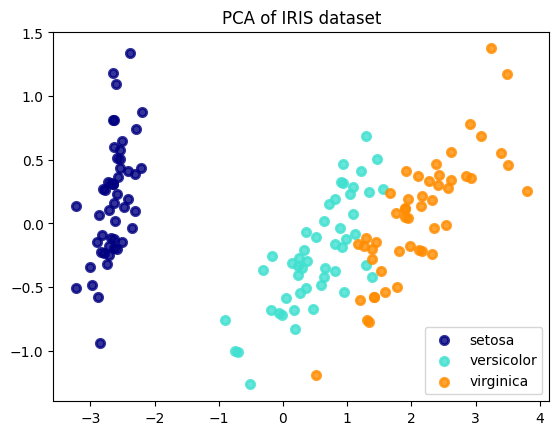

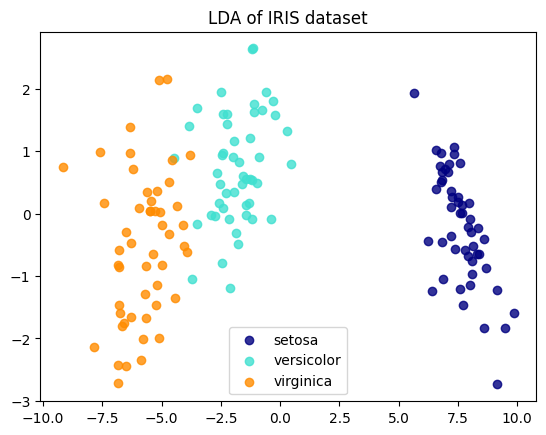

In [13]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print("explained variance ratio (first two components): %s" % str(pca.explained_variance_ratio_))
plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of IRIS dataset")

plt.show()

**Xử lý yêu cầu thực hành**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Chia dữ liệu Train:Test = 4:1 với stratification để đảm bảo cân bằng giữa các lớp
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    stratify=y, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

=== Kết quả với dữ liệu nguyên bản ===
Độ chính xác: 0.9333
Ma trận nhầm lẫn:


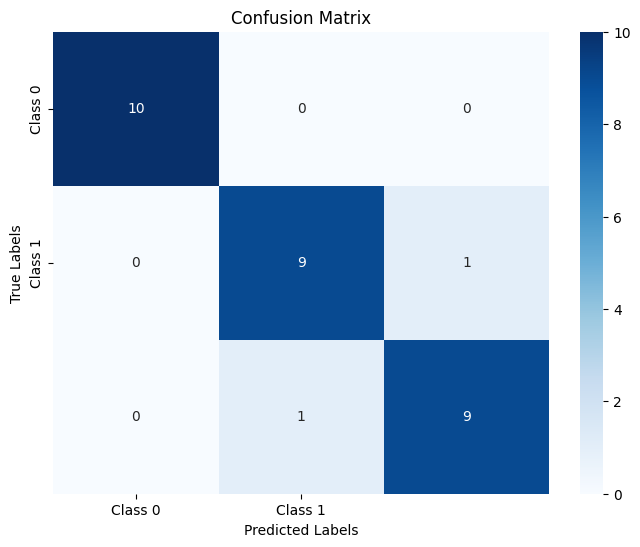

In [4]:
# a) Với dữ liệu nguyên bản
print("=== Kết quả với dữ liệu nguyên bản ===")
lr_original = LogisticRegression(max_iter=1000)
lr_original.fit(X_train_scaled, y_train)
y_pred_original = lr_original.predict(X_test_scaled)

accuracy_original = accuracy_score(y_test, y_pred_original)
conf_matrix_original = confusion_matrix(y_test, y_pred_original)

print(f"Độ chính xác: {accuracy_original:.4f}")
print("Ma trận nhầm lẫn:")
# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_original, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


=== Kết quả với PCA (2 chiều) ===
1. Độ chính xác: 0.9000
2. Tỷ lệ phương sai giải thích: [0.72677234 0.23066667]
3. Ma trận nhầm lẫn:


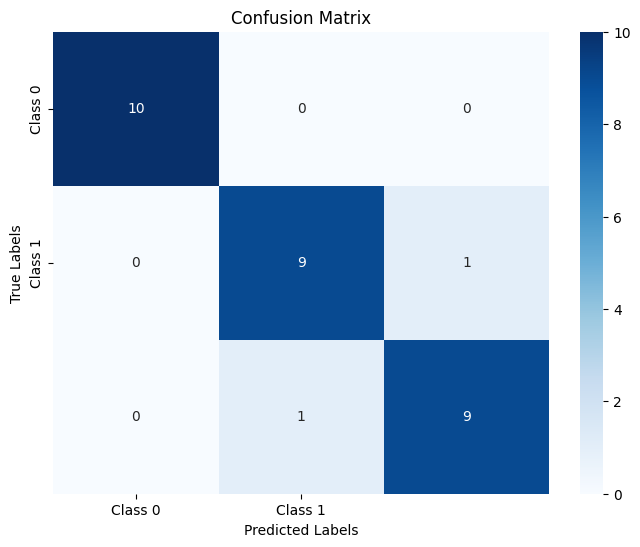

In [8]:
# b) Với dữ liệu giảm chiều
# i) Sử dụng PCA
print("\n=== Kết quả với PCA (2 chiều) ===")
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

lr_pca = LogisticRegression(max_iter=1000)
lr_pca.fit(X_train_pca, y_train)
y_pred_pca = lr_pca.predict(X_test_pca)

accuracy_pca = accuracy_score(y_test, y_pred_pca)
conf_matrix_pca = confusion_matrix(y_test, y_pred_pca)

print(f"1. Độ chính xác: {accuracy_pca:.4f}")
print(f"2. Tỷ lệ phương sai giải thích: {pca.explained_variance_ratio_}")
print("3. Ma trận nhầm lẫn:")
# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_original, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


=== Kết quả với LDA (2 chiều) ===
Độ chính xác: 1.0000
Ma trận nhầm lẫn:


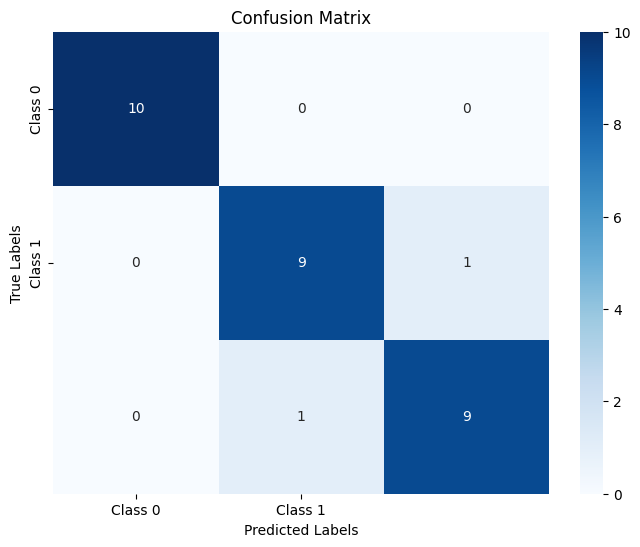

In [9]:
# ii) Sử dụng LDA
print("\n=== Kết quả với LDA (2 chiều) ===")
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

lr_lda = LogisticRegression(max_iter=1000)
lr_lda.fit(X_train_lda, y_train)
y_pred_lda = lr_lda.predict(X_test_lda)

accuracy_lda = accuracy_score(y_test, y_pred_lda)
conf_matrix_lda = confusion_matrix(y_test, y_pred_lda)

print(f"Độ chính xác: {accuracy_lda:.4f}")
print("Ma trận nhầm lẫn:")
# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_original, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

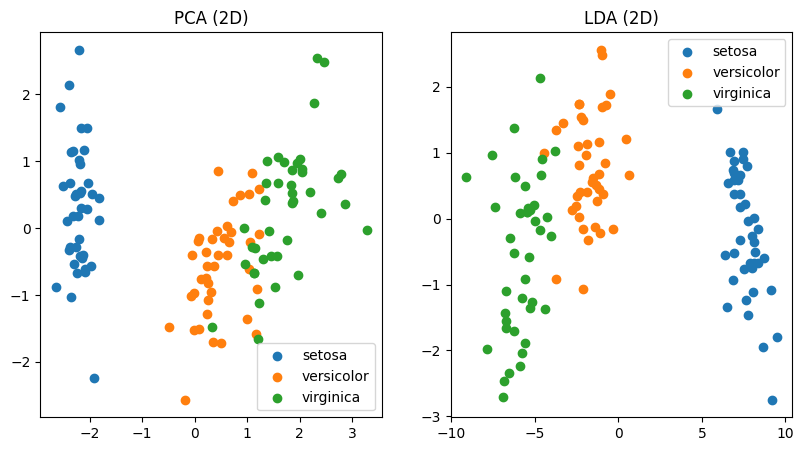

In [10]:
# Vẽ biểu đồ so sánh
plt.figure(figsize=(15, 5))

# PCA
plt.subplot(131)
for i, target_name in enumerate(target_names):
    plt.scatter(X_train_pca[y_train == i, 0], 
                X_train_pca[y_train == i, 1], 
                label=target_name)
plt.title('PCA (2D)')
plt.legend()

# LDA
plt.subplot(132)
for i, target_name in enumerate(target_names):
    plt.scatter(X_train_lda[y_train == i, 0], 
                X_train_lda[y_train == i, 1], 
                label=target_name)
plt.title('LDA (2D)')
plt.legend()

plt.show()

## Ví dụ B2 (Bài tập thực hành 2)

In [21]:
import os
import numpy as np
import gzip
import time
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# set names to the paths because they're too long
data_path = 'handwritting'
# train path
train_images_path = os.path.join(data_path, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_path, 'train-labels-idx1-ubyte.gz')
# test path
test_images_path = os.path.join(data_path, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_path, 't10k-labels-idx1-ubyte.gz')


In [22]:
def get_mnist_data(images_path, labels_path, num_images, shuffle=False, _is=True, image_size=28):
    """
    This shuffle param is active when .gz is downloaded at:
    - 'http://yann.lecun.com/exdb/mnist/'
    - This function return random num_images in 60000 or 10000
    """
    # read data
    import gzip # to decompress gz (zip) file
    # open file training to read training data
    f_images = gzip.open(images_path,'r')

    # skip 16 first bytes because these are not data, only header infor
    f_images.read(16)

    # general: read num_images data samples if this parameter is set;
    # if not, read all (60000 training or 10000 test)
    real_num = num_images if not shuffle else (60000 if _is else 10000)
    # read all data to buf_images (28x28xreal_num)
    buf_images = f_images.read(image_size * image_size * real_num)

    # images
    images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32)
    images = images.reshape(real_num, image_size, image_size,)

    # Read labels
    f_labels = gzip.open(labels_path,'r')
    f_labels.read(8)

    labels = np.zeros((real_num)).astype(np.int64)

    # rearrange to correspond the images and labels
    for i in range(0, real_num):
        buf_labels = f_labels.read(1)
        labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)

    # shuffle to get random images data
    if shuffle is True:
        rand_id = np.random.randint(real_num, size=num_images)

        images = images[rand_id, :]
        labels = labels[rand_id,]

    # change images data to type of vector 28x28 dimentional
    images = images.reshape(num_images, image_size * image_size)
    return images, labels

# Gọi phương thức đọc dữ liệu để kiếm tra xem đọc đúng hay không:
train_images, train_labels = get_mnist_data(train_images_path, train_labels_path, 5000, shuffle=True)
test_images, test_labels = get_mnist_data(  test_images_path, test_labels_path, 10000, _is=False, shuffle=True)
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

# Convert matrix to image
def get_image(image):
    return image.reshape(28, 28)

def convert_labels(y, C):
    from scipy import sparse
    Y = sparse.coo_matrix((np.ones_like(y),
    (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y

(5000, 784) (5000,)
(10000, 784) (10000,)


4 3


<Figure size 640x480 with 0 Axes>

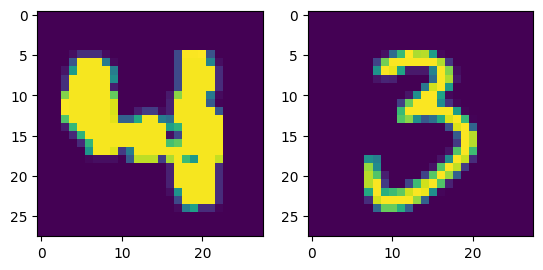

In [23]:
# for display and test digit :D
import random
import matplotlib.pyplot as plt

index = random.randint(0, 1000)
print(train_labels[index], test_labels[index])

train_image = np.asarray(get_image(train_images[index])).squeeze()
test_image = np.asarray(get_image(test_images[index])).squeeze()

plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, 2)

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(train_image)
axarr[1].imshow(test_image)
plt.show()

In [24]:
# 1) Đọc dữ liệu và giảm chiều
# Lấy 5000 ảnh bất kỳ
X, y = get_mnist_data(train_images_path, train_labels_path, 5000, shuffle=True)
print("Kích thước ban đầu:", X.shape)

# Giảm chiều với PCA xuống 100
pca = PCA(n_components=100)
X_pca = pca.fit_transform(X)
print("Kích thước sau PCA:", X_pca.shape)

# Giảm chiều với LDA xuống 8 (số lớp - 1 = 10 - 1 = 9, nhưng ta chọn 8)
lda = LDA(n_components=8)
X_lda = lda.fit_transform(X, y)
print("Kích thước sau LDA:", X_lda.shape)

Kích thước ban đầu: (5000, 784)
Kích thước sau PCA: (5000, 100)
Kích thước sau LDA: (5000, 8)


In [31]:
# 2) Phân loại và so sánh
def train_and_evaluate(X_data, y_data, data_name):
    # Chia dữ liệu
    X_train, X_val, y_train, y_val = train_test_split(
        X_data, y_data, test_size=0.3, random_state=42
    )
    
    # Huấn luyện và đánh giá
    lr = LogisticRegression(multi_class='multinomial', max_iter=1000)
    
    start_time = time.time()
    lr.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    y_pred = lr.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    
    print(f"\nKết quả với {data_name}:")
    print(f"Độ chính xác: {accuracy:.4f}")
    print(f"Thời gian huấn luyện: {train_time:.4f} giây")
    
    return accuracy, train_time

# a) Dữ liệu nguyên bản (784 chiều)
acc_orig, time_orig = train_and_evaluate(X, y, "dữ liệu nguyên bản (784 chiều)")

# b) Dữ liệu PCA (100 chiều)
acc_pca, time_pca = train_and_evaluate(X_pca, y, "dữ liệu PCA (100 chiều)")

# c) Dữ liệu LDA (8 chiều)
acc_lda, time_lda = train_and_evaluate(X_lda, y, "dữ liệu LDA (8 chiều)")



Kết quả với dữ liệu nguyên bản (784 chiều):
Độ chính xác: 0.8647
Thời gian huấn luyện: 0.6152 giây

Kết quả với dữ liệu PCA (100 chiều):
Độ chính xác: 0.8500
Thời gian huấn luyện: 1.2814 giây

Kết quả với dữ liệu LDA (8 chiều):
Độ chính xác: 0.9167
Thời gian huấn luyện: 0.0418 giây


In [35]:

# So sánh và kết luận
print("\nSo sánh tổng hợp:")
print(f"{'Phương pháp':<20} {'Độ chính xác':<15} {'Thời gian (s)':<15}")
print("-" * 50)
print(f"{'Nguyên bản':<20} {acc_orig:<15.4f} {time_orig:<15.4f}")
print(f"{'PCA':<20} {acc_pca:<15.4f} {time_pca:<15.4f}")
print(f"{'LDA':<20} {acc_lda:<15.4f} {time_lda:<15.4f}")

# Đưa ra nhận xét
best_method = max([("Nguyên bản", acc_orig, time_orig), 
                  ("PCA", acc_pca, time_pca), 
                  ("LDA", acc_lda, time_lda)], 
                 key=lambda x: x[1])

print(f"\n*Nhận xét:")
print(f"- Phương pháp tốt nhất về độ chính xác: {best_method[0]} (accuracy: {best_method[1]:.4f})")
print(f"- Phương pháp nhanh nhất: {min([('Nguyên bản', time_orig), ('PCA', time_pca), ('LDA', time_lda)], key=lambda x: x[1])[0]}")
print("- Có sự bất thường khi tốc độ chạy PCA lớn hơn Nguyên bản")
print("- LDA với chỉ 8 chiều mà đạt accuracy cao hơn nguyên bản (784 chiều) là khá bất ngờ, có vẻ có vấn đề trong dữ liêuj.")
print("*Kết luận: ")
print("- Nếu ưu tiên độ chính xác: Chọn", best_method[0])


So sánh tổng hợp:
Phương pháp          Độ chính xác    Thời gian (s)  
--------------------------------------------------
Nguyên bản           0.8647          0.6152         
PCA                  0.8500          1.2814         
LDA                  0.9167          0.0418         

*Nhận xét:
- Phương pháp tốt nhất về độ chính xác: LDA (accuracy: 0.9167)
- Phương pháp nhanh nhất: LDA
- Có sự bất thường khi tốc độ chạy PCA lớn hơn Nguyên bản
- LDA với chỉ 8 chiều mà đạt accuracy cao hơn nguyên bản (784 chiều) là khá bất ngờ, có vẻ có vấn đề trong dữ liêuj.
*Kết luận: 
- Nếu ưu tiên độ chính xác: Chọn LDA


## Ví dụ B.4. (Bài tập thực hành 3):

Tạo dữ liệu X

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# path to the database - change it if needed
path = 'face_data\\'

ids = range(1, 16) # 15 people
states = ['centerlight', 'glasses', 'happy', 'leftlight',
 'noglasses', 'normal', 'rightlight','sad',
 'sleepy', 'surprised', 'wink' ]
prefix = 'subject'
surfix = '.png' #file extension is png

# open one picture to get the image's size
fn = prefix + '01.' + states[0] + surfix
im = cv2.imread(path + fn, 0)

h = im.shape[0] # hight
w = im.shape[1] # width

D = h * w
N = len(states)*15
print(N, D, h, w)

X = np.zeros((D, N))

# collect all data
count = 0

# there are 15 people
for person_id in range(1, 16):
    for state in states:

        # get name of each image file
        fn = path + prefix + str(person_id).zfill(2) + '.' + state + surfix
        
        # open the file and read as grey image
        tmp = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)

        # then add image to dataset X
        X[:, count] = tmp.reshape(D)
        count += 1


165 77760 243 320


In [2]:
import numpy as np
import cv2
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Tạo nhãn y
y = np.repeat(np.arange(15), 11)  # 15 người, mỗi người 11 trạng thái

# a. Giảm chiều dữ liệu xuống 135 bằng PCA
pca = PCA(n_components=135)
X_reduced = pca.fit_transform(X.T)  # Chuyển vị X để có shape (165, 77760)
print("Shape sau khi giảm chiều:", X_reduced.shape)

Shape sau khi giảm chiều: (165, 135)


In [5]:
# b. Phân loại với train:test = 0.7:0.3
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.3, random_state=42
)

# Multinomial Logistic Regression
lr = LogisticRegression(multi_class='multinomial', max_iter=1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
print("Độ chính xác Logistic Regression:", lr_accuracy)

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)
print("Độ chính xác Naive Bayes:", nb_accuracy)

import warnings
warnings.filterwarnings('ignore')

Độ chính xác Logistic Regression: 0.98
Độ chính xác Naive Bayes: 0.76



Dự đoán cho 5 ảnh mới:
Ảnh 1:
Logistic Regression dự đoán: Người 1
Naive Bayes dự đoán: Người 1
Ảnh 2:
Logistic Regression dự đoán: Người 1
Naive Bayes dự đoán: Người 1
Ảnh 3:
Logistic Regression dự đoán: Người 1
Naive Bayes dự đoán: Người 1
Ảnh 4:
Logistic Regression dự đoán: Người 5
Naive Bayes dự đoán: Người 1
Ảnh 5:
Logistic Regression dự đoán: Người 1
Naive Bayes dự đoán: Người 15


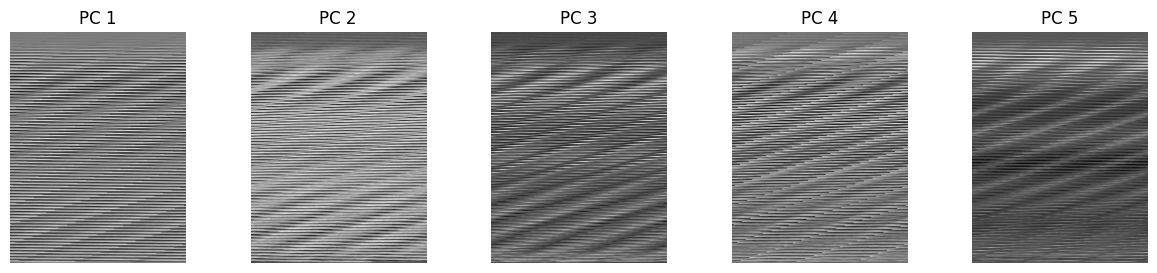

In [9]:
# c. Test với 5 ảnh mới
def preprocess_new_image(image_path, target_size=(320, 243)):
    # Đọc ảnh và chuyển sang grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Resize về kích thước mong muốn
    img_resized = cv2.resize(img, (target_size[1], target_size[0]))
    
    # Chuyển thành vector
    img_vector = img_resized.reshape(-1)
    
    # Áp dụng PCA đã train
    img_reduced = pca.transform(img_vector.reshape(1, -1))
    
    return img_reduced

# Giả sử có 5 ảnh mới
new_image_paths = [
    'vidu4\\1.png',
    'vidu4\\2.png',
    'vidu4\\3.png',
    'vidu4\\4.png',
    'vidu4\\5.png'
]

# Xử lý và dự đoán cho từng ảnh mới
print("\nDự đoán cho 5 ảnh mới:")
for i, img_path in enumerate(new_image_paths):
    try:
        # Tiền xử lý ảnh
        img_processed = preprocess_new_image(img_path)
        
        # Dự đoán với cả hai mô hình
        lr_pred = lr.predict(img_processed)
        nb_pred = nb.predict(img_processed)
        
        print(f"Ảnh {i+1}:")
        print(f"Logistic Regression dự đoán: Người {lr_pred[0] + 1}")
        print(f"Naive Bayes dự đoán: Người {nb_pred[0] + 1}")
        
    except Exception as e:
        print(f"Lỗi khi xử lý ảnh {i+1}: {str(e)}")

# Visualize một số thành phần chính (tùy chọn)
n_components_to_show = 5
plt.figure(figsize=(15, 3))
for i in range(n_components_to_show):
    plt.subplot(1, n_components_to_show, i+1)
    plt.imshow(pca.components_[i].reshape(320, 243), cmap='gray')
    plt.title(f'PC {i+1}')
    plt.axis('off')
plt.show()